# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

#m

Если вы всё сделали правильно, то выше должна открыться карта

In [ ]:
!pip install haversine


### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [ ]:
import numpy as np

import pandas as pd  # your favorite data package
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  # your favorite visualization package
from tqdm import tqdm

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
#описание с kaggle


Data fields\
id - a unique identifier for each trip\
vendor_id - a code indicating the provider associated with the trip record\
pickup_datetime - date and time when the meter was engaged\
dropoff_datetime - date and time when the meter was disengaged\
passenger_count - the number of passengers in the vehicle (driver entered value)\
pickup_longitude - the longitude where the meter was engaged\
pickup_latitude - the latitude where the meter was engaged\
dropoff_longitude - the longitude where the meter was disengaged\
dropoff_latitude - the latitude where the meter was disengaged\
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip\
trip_duration - duration of the trip in seconds

In [ ]:
df = pd.read_csv('train_taxi.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df['id'].nunique()
# нет дубликатов записей по поездкам

In [ ]:
df.vendor_id.value_counts()
# всего 2 компании 

In [ ]:
df.isnull().sum()
# пропусков нет

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
df.drop('dropoff_datetime', axis=1, inplace=True)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [ ]:
plt.figure(figsize=(12,8))

sns.histplot(df['trip_duration'], bins=30, kde=True, color="#0C742B", edgecolor='red')

plt.axvline(df['trip_duration'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['trip_duration'].median():.1f}')
plt.axvline(df['trip_duration'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['trip_duration'].mean():.1f}')

plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности поездок')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["trip_duration"]], 
    orient="h",
    width=0.6,
    color="#0C742B",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение продолжительности поездок", pad=20, fontsize=14)
plt.xlabel("Продолжительность поездки", fontsize=12)
plt.yticks([])

In [ ]:
df["trip_duration"].describe()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В целевой переменной есть значительные выбросы, которые искажают распределение. Интересно посмотреть, сколько их. Я посмотрю с помощью интерквартильного размаха

In [ ]:
df_small = df[(df['trip_duration'] >= np.quantile(df['trip_duration'], 0.25)) & (df['trip_duration'] <= np.quantile(df['trip_duration'], 0.75))]
print(f'{round(((df.shape[0] - df_small.shape[0]) / df.shape[0])*100, 3)}% данных являются выбросами по методу интерквартильного размаха')

**В целевой переменной слишком большая дисперсия**

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Я думаю, что авторы выбрали RMSLE потому, что распределение таргета не близко к нормальному и в нем много выбросов, из-за чего оптимизация с помощью RMSE затрудняется,
так как RMSE чувствителен к выбросам(так как ошибка возводится в квадрат => сложно оценить модель адекватно).\
В данном случае RMSLE хорош тем, что логарифмическая функция потерь менее чувствительна к выбросам => **оценка качества модели будет более объективной**

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.





**Доказательство**: 

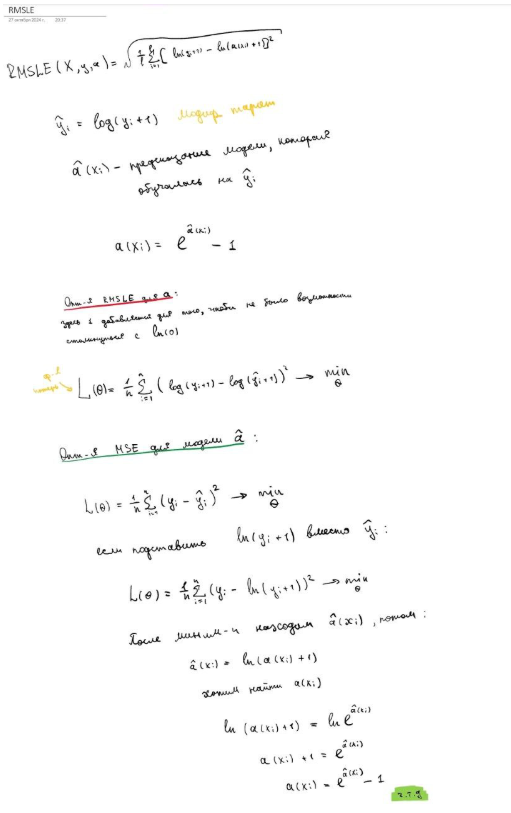

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['log_trip_duration'], bins=30, kde=True, color="#0C742B", edgecolor='red')

plt.axvline(df['log_trip_duration'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['log_trip_duration'].median():.1f}')
plt.axvline(df['log_trip_duration'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['log_trip_duration'].mean():.1f}')

plt.xlabel('Логарифмированная продолжительность поездки')
plt.ylabel('Частота')
plt.title('Гистограмма распределения log(продолжительности поездок + 1)')
plt.legend()
plt.show()

Теперь распределение таргета близко к нормальному. Значит, распределение исходного таргета - логнормальное

In [ ]:
df.drop('trip_duration', axis=1, inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
# наилучшее константное предсказание - это среднее
best_constant_prediction = df['log_trip_duration'].mean()

def rmsle(log1p_y_true, log1p_y_pred):
    log_diff_square = np.square(np.subtract(log1p_y_true, log1p_y_pred)) # получаем массив с разностями логарифмов, возведенных в квадрат
    log_diff_square_sum_mean = np.sum(log_diff_square) / len(log_diff_square) # получаем среднее
    rmsle_metric = np.sqrt(log_diff_square_sum_mean) # берем корень

    return rmsle_metric
    
    raise NotImplementedError

rmsle_best_const = rmsle(df['log_trip_duration'].values, best_constant_prediction)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [ ]:
df['pickup_date'] = df.pickup_datetime.dt.date
df['pickup_date'].nunique()

In [ ]:
trip_day_count = df.groupby('pickup_date')['id'].count().reset_index(name='trip_count').sort_values(by='pickup_date')
trip_day_count.head()

In [ ]:
import plotly.express as px

fig = px.line(trip_day_count, 
              x='pickup_date', 
              y='trip_count', 
              title='Количество поездок по дням в году',
              color_discrete_sequence=["#16B128"])

fig.update_layout(
    xaxis_title='Дата',          
    yaxis_title='Количество поездок',
    title_font_size=20,     
    font=dict(size=12)     
)

fig.update_traces(
    line_width=2       
)

fig.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.


Самые большие просадки наблюдаются 23 января и 30 мая 2016. \
23 января движение на улицах Нью-Йорка было почти остановлено из-за снежной бури. \
30 мая в США федеральный праздник, многие люди не работают. Поэтому поездок меньше, чем обычно

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [ ]:
trip_day_count.pickup_date = pd.to_datetime(trip_day_count.pickup_date)

In [ ]:
# график по дням недели

trip_day_count['weekday'] = trip_day_count.pickup_date.dt.day_name()

weekdays_trip_count = trip_day_count.groupby('weekday')['trip_count'].sum().reset_index(name='trips')

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(data = weekdays_trip_count, x = 'weekday', y = 'trips', color = 'green')

plt.title('Суммарное количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
# график от часов в сутках

trip_day_count_dt = df.groupby('pickup_datetime')['id'].count().reset_index(name='trip_count').sort_values(by='pickup_datetime')

trip_day_count_dt['hour'] = trip_day_count_dt.pickup_datetime.dt.hour
trip_day_count_dt['month'] = trip_day_count_dt.pickup_datetime.dt.month_name()

hour_trip_count = trip_day_count_dt.groupby('hour')['trip_count'].sum().reset_index(name='trips')
#hour_trip_count


In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(data = hour_trip_count, x = 'hour', y = 'trips', color = 'green')

plt.title('Суммарное количество поездок по часам в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок')
plt.show()

Ожидаемая просадка в ночные часы и наибольшее количество поездок в 18-19 часов, когда все едут с работы

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [ ]:
hour_month_trip_count = trip_day_count_dt.groupby(['hour', 'month'])['trip_count'].sum().reset_index(name='trips')


In [ ]:
hour_month_trip_count = hour_month_trip_count.sort_values(by=['month', 'hour'])
#hour_month_trip_count

In [ ]:
import plotly.graph_objects as go

In [ ]:
hr = hour_month_trip_count.copy(deep=True)
hr.head(2)

Данному способу построения графика с несколькими рядами разных цветов я научился на майноре ИАД, нам его показывали на семинаре по временным рядам

In [ ]:
fig = go.Figure()

for i in hr['month'].unique().tolist():
    fig.add_trace(
        go.Scatter(x=hr[hr["month"] == i]["hour"], y=hr[hr["month"] == i]["trips"], name=str(i))
    )
fig.update_layout(title="Зависимость количества поездок от часа в сутках в разрезе по месяцам", xaxis_title="Время в сутках", yaxis_title="Количество поездок")
fig.update_layout(width=1400, height=600)  
fig.show()

In [ ]:
trip_day_count_dt['dayofweek'] = trip_day_count_dt['pickup_datetime'].dt.day_name()
hour_day_trip_count = trip_day_count_dt.groupby(['hour', 'dayofweek'])['trip_count'].sum().reset_index(name='trips')

In [ ]:
hr1 = hour_day_trip_count.copy(deep=True)

In [ ]:
fig = go.Figure()

for i in hr1['dayofweek'].unique().tolist():
    fig.add_trace(
        go.Scatter(x=hr1[hr1["dayofweek"] == i]["hour"], y=hr1[hr1["dayofweek"] == i]["trips"], name=str(i))
    )
fig.update_layout(title="Зависимость количества поездок от часа в сутках в разрезе по дням недели", xaxis_title="Время в сутках", yaxis_title="Количество поездок")
fig.update_layout(width=1400, height=600)  
fig.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


**Выводы по графикам:**

Из графика по месяцам можно заметить, что весенние месяцы лидируют по количеству поездок почти на всем дневном интервале.\
При этом январь почти всегда последний.

Из графика по дням недели можно выделить, что начиная с утренних часов по воскресеньям меньше всего поездок почти на всем промежутке до вечера. При этом в ночные часы воскресенье лидирует. Я предполагаю, что это связано с тем, что ночью с субботы на воскресенье все возвращаются с тусовок. А днем на работу никому не надо, поэтому поездок мало.\
Похожая картина в плане ночных часов и в субботу.

По времени суток можно выделить, что ожидаемо в ночные часы поездок немного, в утренние часы количество нарастает, днем в рабочие часы выходит на плато, а к вечеру сильно возрастает, так как все возвращаются домой.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_date']]

y = df['log_trip_duration']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.3, shuffle=True)

In [ ]:
X_train_c = X_train.copy(deep=True)

In [ ]:
X_train_c.pickup_date = pd.to_datetime(X_train_c.pickup_date)
X_train_c['weekday'] = X_train_c.pickup_date.dt.day_name()
X_train_c['target'] = y_train
day_targt_mean = X_train_c.groupby('weekday')['target'].mean().reset_index(name='mean_target')

plt.figure(figsize=(9, 5))
sns.barplot(data = day_targt_mean, x = 'weekday', y = 'mean_target', color = 'purple')

plt.title('Средний логарифм длительности поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм длительности поездок')
plt.show()

In [ ]:
X_train_c['hour'] = X_train_c.pickup_datetime.dt.hour
X_train_c['target'] = y_train
day_targt_mean = X_train_c.groupby('hour')['target'].mean().reset_index(name='mean_target')

plt.figure(figsize=(9, 5))
sns.barplot(data = day_targt_mean, x = 'hour', y = 'mean_target', color = 'purple')

plt.title('Средний логарифм длительности поездок по часам в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм длительности поездок')
plt.show()

In [ ]:
day_targt_mean = X_train_c.groupby('pickup_date')['target'].mean().reset_index(name='mean_target')
fig = px.line(day_targt_mean, 
              x='pickup_date', 
              y='mean_target', 
              title='Средний логарифм времени поездки по дням в году',
              color_discrete_sequence=["#7E1279"])

fig.update_layout(
    xaxis_title='Дата',          
    yaxis_title='Средний логарифм времени поездки',
    title_font_size=20,     
    font=dict(size=12)     
)

fig.update_traces(
    line_width=2       
)

fig.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики непохожи, так как логарифмирование снижает разрывы между значениями.

Длительность поездок в аномальный период в январе (во время бури) высокая относительно других дней, это судя по всему связано с низкой скоростью передвижения из-за заснеженных дорог.

Заметен **небольшой возрастающий тренд** на графике зависимости log_trip_duration от дня в году.


Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
df4 = df.copy(deep=True)
df4['day_of_week'] = df4['pickup_datetime'].dt.weekday
df4['month'] = df4['pickup_datetime'].dt.month
df4['hour'] = df4['pickup_datetime'].dt.hour

abnormal1_condition = (df4['pickup_datetime'].dt.date.isin([pd.to_datetime('2016-01-23').date(), pd.to_datetime('2016-01-24').date(), pd.to_datetime('2016-05-25').date()]))
df4['abnormal_period_1'] = np.where(abnormal1_condition, 1, 0)

abnormal2_condition = (df4['pickup_datetime'].dt.date.isin([pd.to_datetime('2016-05-29').date(), pd.to_datetime('2016-05-30').date()]))
df4['abnormal_period_2'] = np.where(abnormal2_condition, 1, 0)

df4['day_number'] = df4['pickup_datetime'].dt.dayofyear

In [ ]:
df4.head()

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

День недели и флаги аномальных периодов лучше рассматривать как категориальные, так как в них слишком мало значений. День в году, час в сутках - лучше как числовые

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [ ]:
df5 = df4[['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'day_number', 'log_trip_duration']]

X5 = df5[['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'day_number']]
y5 = df5['log_trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=104, test_size=0.3, shuffle=True)

In [ ]:
# подготовка признаков

categorical_features = ['day_of_week', 'abnormal_period_1', 'abnormal_period_2']  # категориальные признаки
numeric_features = ['day_number', 'hour'] # числовые признаки

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# модель

ridge5 = Ridge() # с параметрами по умолчанию
ridge5.fit(X_train_transformed, y_train)

In [ ]:
# считаем R^2

y_pred = ridge5.predict(X_test_transformed)

r2 = round(r2_score(y_test, y_pred), 4)
print(f'R^2 в Ridge регрессии с параметрами по умолчанию и временными признаками = {round(r2_score(y_test, y_pred), 4)}')


In [ ]:
# считаем rmsle

rmsle1 = rmsle(y_test, y_pred)
rmsle1

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'R2'])

results_df = pd.concat([
    results_df,
    pd.DataFrame([{'Model': 'Ridge с временными признаками', 'RMSLE': rmsle1, 'R2': r2}])
], ignore_index=True)


display(results_df.style
        .background_gradient(subset=['RMSLE', 'R2'], cmap='RdYlGn_r')) # нашел вот такую функцию для красивой визуализации

R^2 в модели очень низкий => малая часть дисперсии объясняется моделью

In [ ]:
coefficients = ridge5.coef_
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
feature_importance = feature_importance.sort_values('coefficient', key=abs, ascending=False)

In [ ]:
# важность признаков

plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(20))
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения из тестовой выборки')
plt.ylabel('Предсказанные значения из тестовой выборки')
plt.show()

По визуализации реальных значений и прогнозов можно убедиться, что предсказательная способность такой модели на низком уровне. Идеальная модель - красная линия

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [ ]:
import random 

In [ ]:
random.seed(123)
df_piece = df.sample(1000)
your_lat_values = df_piece['pickup_latitude'].values
your_lon_values = df_piece['pickup_longitude'].values

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Сильно выделяется район Манхеттен из-за большого количества офисов и бизнес-центров там.\
Также выделяется аэропорт, от которого все едут на такси.\
Третьим скоплением является второй аэропорт

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
from haversine import haversine
from haversine import haversine_vector

In [ ]:
df['haversine'] = haversine_vector(
    df[['pickup_latitude', 'pickup_longitude']].values,
    df[['dropoff_latitude', 'dropoff_longitude']].values,
    unit='km'
)

In [ ]:
df.head(3)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
df['log_haversine'] = np.log1p(df['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [ ]:
df['log_trip_duration'].corr(df['haversine']), df['log_trip_duration'].corr(df['log_haversine'])

Действительно, линейная зависимость между логарифмами более сильно выражена

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
df['trip_duration'] = np.expm1(df['log_trip_duration']) # в секундах
df['trip_duration_h'] =  df['trip_duration'] / 3600                                                   # перевожу в часы

df['speed_mean'] = df['haversine'] / df['trip_duration_h']
df


In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['speed_mean'], bins=30, kde=True, color="#1C0C74", edgecolor='red')

plt.axvline(df['speed_mean'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['speed_mean'].median():.1f}')
plt.axvline(df['speed_mean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['speed_mean'].mean():.1f}')

plt.xlabel('Средняя скорость во время поездки')
plt.ylabel('Частота')
plt.title('Гистограмма распределения средней скорости во время поездок')
plt.legend()
plt.show()

In [ ]:
df4['trip_duration'] = np.expm1(df4['log_trip_duration']) # в секундах
df4['trip_duration_h'] =  df4['trip_duration'] / 3600                                                   # перевожу в часы
df4['haversine'] = haversine_vector(
    df4[['pickup_latitude', 'pickup_longitude']].values,
    df4[['dropoff_latitude', 'dropoff_longitude']].values,
    unit='km'
)
df4['speed_mean'] = df4['haversine'] / df4['trip_duration_h']
#df

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [ ]:
df_restr  = df4[df4['speed_mean'] <= np.quantile(df4['speed_mean'], 0.75)]

plt.figure(figsize=(12,8))
sns.histplot(df_restr['speed_mean'], bins=30, kde=True, color="#1C0C74", edgecolor='red')

plt.axvline(df_restr['speed_mean'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df_restr['speed_mean'].median():.1f}')
plt.axvline(df_restr['speed_mean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df_restr['speed_mean'].mean():.1f}')

plt.xlabel('Средняя скорость во время поездки')
plt.ylabel('Частота')
plt.title('Гистограмма распределения средней скорости во время поездок')
plt.legend()
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [ ]:
day_hour_speed = df_restr.groupby(['day_of_week', 'hour'])['speed_mean'].median().reset_index(name='speed_median')

In [ ]:
heatmap_data = day_hour_speed.pivot_table(
    index='day_of_week',
    columns='hour',
    values='speed_median'
)
heatmap_data


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='viridis',      
    annot=True,          
    fmt='.2f',          
    cbar_kws={'label': 'Значения медианы скорости'}
)
plt.title('Медианы скорости для каждой пары (день недели, час в сутках)', fontsize=20)
plt.xlabel('Медиана скорости', fontsize=15)
plt.ylabel('День недели (0 - понедельник, 6 - воскресенье)', fontsize=15)
plt.tight_layout()
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Значение скорости нельзя использовать во время обучения потому, что этот признак сгенерирован напрямую из длительности поездки (таргета)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

**Скорость минимальна по будням в дневное время** (пробки на дорогах сильно влияют на это).\
**Скорость максимальна ранним утром**, в 4-6 утра, в любые дни недели.

In [ ]:
traffic_jams = ( (df4['day_of_week'].isin([0,1,2,3,4])) & (df4['hour'].isin([9,10,11,12,13,14,15])))
df4['traffic_jams_time'] = np.where(traffic_jams, 1, 0)  # бинарный признак что поездка совершается в период пробок

free_roads = ( (df4['hour'].isin([4, 5, 6])))
df4['free_roads_time'] = np.where(free_roads, 1, 0) # бинарный признак что поездка совершается в период свободных дорог

In [ ]:
df4.head()

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [ ]:
#намеченные пункты
important_places = {
    'manch': {'lat': 40.7553, 'lon': -73.9845},  # центр Манхеттена - района с огромным скоплением поездок
    'airport_kennedy': {'lat': 40.6413, 'lon': -73.7781},  # Аэропорт Кеннеди
    'place_3': {'lat': 40.7420, 'lon': -73.9696}   # Edo Seaplane Base
}

In [ ]:
#Функция для проверки близости к этим пунктам. Я взял радиус 4 км, так как ширина Манхеттена 3.7 км

def is_near_point(point_lat, point_lon, target_lat, target_lon, max_distance_km=4.0):

    distance = haversine(
        (point_lat, point_lon),
        (target_lat, target_lon),
        unit='km'
    )
    return 1 if distance <= max_distance_km else 0

In [ ]:
important_places.items()

In [ ]:
RADIUS_KM = 4.0

for place_name, coords in tqdm(important_places.items()):
    # Поездка началась в этом месте
    df4[f'start_{place_name}'] = df4.apply(
        lambda row: is_near_point(
            row['pickup_latitude'], 
            row['pickup_longitude'],
            coords['lat'], 
            coords['lon'],
            RADIUS_KM
        ),
        axis=1
    )
    
    # Поездка закончилась в этом месте
    df4[f'end_{place_name}'] = df4.apply(
        lambda row: is_near_point(
            row['dropoff_latitude'], 
            row['dropoff_longitude'],
            coords['lat'], 
            coords['lon'],
            RADIUS_KM
        ),
        axis=1
    )

In [ ]:
df4.head(2)

In [ ]:
df4.columns

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='traffic_jams_time', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта времени загруженных дорог', fontsize=15)
plt.xlabel('Время пробок на дорогах', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Четко видно, что распределение логарифмированного времени поездки сдвинуто вправо для поездок, прошедших в периоды пробок => **признак полезный**

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='free_roads_time', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта времени свободных дорог', fontsize=15)
plt.xlabel('Время свободных дорог', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Здесь ожидаемо обратная ситуация => **признак полезный**

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='start_manch', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта начала поездки в Манхеттене', fontsize=15)
plt.xlabel('Поездка началась в Манхеттене', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Скорее всего, такая картина связана с тем, что люди в Mанхеттене редко заказывают такси, чтобы ехать куда-то далеко (например, за город). Они берут такси и перемещаются между офисами / между домом и офисом

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='end_manch', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта окончания поездки в Манхеттене', fontsize=15)
plt.xlabel('Поездка закончилась в Манхеттене', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Похожая картина, те же причины

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='start_airport_kennedy', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта начала поездки в районе аэропорта им. Кеннеди', fontsize=15)
plt.xlabel('Поездка началась в районе аэропорта им. Кеннеди', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Люди, прилетевшие в Нью-Йорк на самолете, заказывают такси на дальние расстояния (например, до гостиницы). Поэтому для района аэропорта длительность поездок существенно выше чем в среднем по городу

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='end_airport_kennedy', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта окончания поездки в районе аэропорта им. Кеннеди', fontsize=15)
plt.xlabel('Поездка закончилась в районе аэропорта им. Кеннеди', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Похожая картина. До аэропорта люди добираются зачастую издалека

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='start_place_3', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта начала поездки в районе Edo Seaplane Base', fontsize=15)
plt.xlabel('Поездка началась в районе Edo Seaplane Base', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

 Здесь разница не такая ощутимая, да и я сходу немогу придумать причин, почкму поездки, начинающиеся в районе базы гидросамолетов в среднем менее долгие

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='end_place_3', y='log_trip_duration', data=df4, palette='muted')
plt.title('Зависимость Логарифма времени поездки от факта окончания поездки в районе Edo Seaplane Base', fontsize=15)
plt.xlabel('Поездка закончилась в районе Edo Seaplane Base', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Да, **признаки получились очень хорошими**, расписал подробнее выше

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

**В написании трансформера мне помог deepseek**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import folium

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=10, n_cols=6, quantile_low=0.05, quantile_high=0.95):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.quantile_low = quantile_low
        self.quantile_high = quantile_high
        
    def show_map(self, X_sample=None, sample_size=1000):
        
        center_lat = (self.lat_min + self.lat_max) / 2
        center_lon = (self.lon_min + self.lon_max) / 2
        
        m = folium.Map(location=[center_lat, center_lon], zoom_start=12)
        
        folium.Rectangle(
            bounds=[[self.lat_min, self.lon_min], [self.lat_max, self.lon_max]],
            color='red',
            fill=False,
            weight=3,
            popup=f"Main Area: {self.lat_min:.4f}-{self.lat_max:.4f} lat, {self.lon_min:.4f}-{self.lon_max:.4f} lon"
        ).add_to(m)
        
        for i in range(self.n_rows + 1):
            for j in range(self.n_cols + 1):
                lat = self.lat_min + i * self.lat_step
                lon = self.lon_min + j * self.lon_step
                
                if i < self.n_rows and j < self.n_cols:
                    cell_bounds = [
                        [self.lat_min + i * self.lat_step, self.lon_min + j * self.lon_step],
                        [self.lat_min + (i+1) * self.lat_step, self.lon_min + (j+1) * self.lon_step]
                    ]
                    
                    folium.Rectangle(
                        bounds=cell_bounds,
                        color='blue',
                        fill=False,
                        weight=1,
                        opacity=0.5,
                        popup=f"Cell ({i},{j})"
                    ).add_to(m)
        
        if X_sample is not None:
            if len(X_sample) > sample_size:
                X_sample = X_sample.sample(sample_size)
                
            for _, row in X_sample.iterrows():
                folium.CircleMarker(
                    location=[row['pickup_latitude'], row['pickup_longitude']],
                    radius=2,
                    color='green',
                    fill=True,
                    fillColor='green',
                    opacity=0.6,
                    popup=f"Lat: {row['pickup_latitude']:.4f}, Lon: {row['pickup_longitude']:.4f}"
                ).add_to(m)
        
        folium.Marker([self.lat_min, self.lon_min], popup='SW Corner').add_to(m)
        folium.Marker([self.lat_max, self.lon_max], popup='NE Corner').add_to(m)
        
        return m

    def fit(self, X, y=None):
    
        lat = X['pickup_latitude']
        lon = X['pickup_longitude']
    
        self.lat_min = lat.quantile(0.0005)  
        self.lat_max = lat.quantile(0.9995)  
        self.lon_min = lon.quantile(0.0005)
        self.lon_max = lon.quantile(0.9995)
    
        lat_median = lat.median()
        lon_median = lon.median()
        lat_range = (self.lat_max - self.lat_min) * 0.3  
        lon_range = (self.lon_max - self.lon_min) * 0.3
    
        self.lat_min = lat_median - lat_range / 2
        self.lat_max = lat_median + lat_range / 2
        self.lon_min = lon_median - lon_range / 2
        self.lon_max = lon_median + lon_range / 2
    
        self.lat_step = (self.lat_max - self.lat_min) / self.n_rows
        self.lon_step = (self.lon_max - self.lon_min) / self.n_cols
    
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        
        pickup_lat_idx = ((X['pickup_latitude'] - self.lat_min) // self.lat_step).astype(int)
        pickup_lon_idx = ((X['pickup_longitude'] - self.lon_min) // self.lon_step).astype(int)
        
        dropoff_lat_idx = ((X['dropoff_latitude'] - self.lat_min) // self.lat_step).astype(int)
        dropoff_lon_idx = ((X['dropoff_longitude'] - self.lon_min) // self.lon_step).astype(int)
        
        pickup_in_bounds = (
            (X['pickup_latitude'] >= self.lat_min) & (X['pickup_latitude'] <= self.lat_max) &
            (X['pickup_longitude'] >= self.lon_min) & (X['pickup_longitude'] <= self.lon_max)
        )
        
        dropoff_in_bounds = (
            (X['dropoff_latitude'] >= self.lat_min) & (X['dropoff_latitude'] <= self.lat_max) &
            (X['dropoff_longitude'] >= self.lon_min) & (X['dropoff_longitude'] <= self.lon_max)
        )
        
        X_transformed['pickup_cell_id'] = np.where(
            pickup_in_bounds,
            pickup_lat_idx * self.n_cols + pickup_lon_idx,
            -1
        )
        
        X_transformed['dropoff_cell_id'] = np.where(
            dropoff_in_bounds,
            dropoff_lat_idx * self.n_cols + dropoff_lon_idx,
            -1
        )
        
        return X_transformed

In [ ]:
df4.columns

In [ ]:
df9 = df4[['vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'pickup_date', 'day_of_week', 'month', 'hour', 'abnormal_period_1',
       'abnormal_period_2', 'day_number', 'trip_duration', 'trip_duration_h',
       'haversine', 'speed_mean', 'traffic_jams_time', 'free_roads_time',
       'start_manch', 'end_manch', 'start_airport_kennedy',
       'end_airport_kennedy', 'start_place_3', 'end_place_3']]

X9 = df9[['vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_date', 'day_of_week', 'month', 'hour', 'abnormal_period_1',
       'abnormal_period_2', 'day_number',
       'haversine', 'speed_mean', 'traffic_jams_time', 'free_roads_time',
       'start_manch', 'end_manch', 'start_airport_kennedy',
       'end_airport_kennedy', 'start_place_3', 'end_place_3']]
y9 = df9['log_trip_duration']

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, random_state=104, test_size=0.3, shuffle=True)

In [ ]:
transformer = MapGridTransformer(n_rows=8, n_cols=4)
transformer.fit(X9_train)

map_obj = transformer.show_map(X9_train.sample(500))  # 500 случайных точек
map_obj.save('grid_map.html')  
map_obj

## Добавляю новые признаки

In [ ]:
X9_train_transformed = transformer.transform(X9_train)
X9_test_transformed = transformer.transform(X9_test)

In [ ]:
X9_train_transformed.head(2)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
X9_train_transformed.columns

In [ ]:
# подготовка признаков

categorical_features = ['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'traffic_jams_time', 'free_roads_time', 'start_manch',
       'end_manch', 'start_airport_kennedy', 'end_airport_kennedy',
       'start_place_3', 'end_place_3', 'pickup_cell_id', 'dropoff_cell_id']  # категориальные признаки

numeric_features = ['day_number'] # числовые признаки


preprocessor9 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


preprocessor9.fit(X9_train_transformed)
X9_train_transformed = preprocessor9.transform(X9_train_transformed)
X9_test_transformed = preprocessor9.transform(X9_test_transformed)

In [ ]:
# модель

ridge9 = Ridge() # с параметрами по умолчанию
ridge9.fit(X9_train_transformed, y9_train)

In [ ]:
# считаем R^2

y_pred9 = ridge9.predict(X9_test_transformed)

r2_2 = round(r2_score(y9_test, y_pred9), 4)
print(f'R^2 в Ridge регрессии с параметрами по умолчанию, временными признаками и признаками на основе координат = {round(r2_score(y9_test, y_pred9), 4)}')

C добавлением признаков на основе координат **R2 значительно вырос**

In [ ]:
# считаем rmsle

rmsle2 = rmsle(y9_test, y_pred9)

In [ ]:
results_df = pd.concat([
    results_df,
    pd.DataFrame([{'Model': 'Ridge с временными признаками и признаками на основе координат', 'RMSLE': rmsle2, 'R2': r2_2}])
], ignore_index=True)


display(results_df.style
    .background_gradient(subset=['RMSLE'], cmap='RdYlGn_r')  
    .background_gradient(subset=['R2'], cmap='RdYlGn')      
)

In [ ]:
# посмотрим на коэффициенты:
coefficients = ridge9.coef_
feature_names = preprocessor9.get_feature_names_out()
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
feature_importance = feature_importance.sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(20))
plt.xlabel('Значение коэффициента')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y9_test, y_pred9, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения из тестовой выборки')
plt.ylabel('Предсказанные значения из тестовой выборки')
plt.show()

**Картина чуть лучше, уже не просто прямая горизонтальная линия**

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

## vendor_id

In [ ]:
df4.vendor_id.value_counts()

Этот признак может быть потенциально полезен потому, что операторы могут работать в разных частях города => среднее время поездки может отличаться для них. Проверим это визуализацией

In [ ]:
vendor = df4.groupby('vendor_id')['trip_duration'].mean().reset_index(name = 'q_trips')
#vendor

plt.figure(figsize=(10, 7))
sns.barplot(data = vendor, x = 'vendor_id', y = 'q_trips', color = 'orange')

plt.title('Средняя длительность поездок по перевозчикам')
plt.xlabel('Перевозчик')
plt.ylabel('Средняя длительность поездок')
plt.show()

Гипотеза подтвердилась

## passenger_count

In [ ]:
df4.passenger_count.value_counts()

Пока не приходит в голову чем может быть полезен признак. Построим аналогичную визуализацию

In [ ]:
vendor = df4.groupby('passenger_count')['trip_duration'].mean().reset_index(name = 'q_trips')
#vendor

plt.figure(figsize=(10, 7))
sns.barplot(data = vendor, x = 'passenger_count', y = 'q_trips', color = 'orange')

plt.title('Средняя длительность поездок по количеству пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('Средняя длительность поездок')
plt.show()

Для 7+ пассажиров очень мало наблюдений, поэтому тут выводы сделать сложно.\
Для остального количества пассажиорв заметен возрастающий тренд длительности поездки по количеству пассажиров.\
Это может быть связано с тем, что:
1) Машина медленнее едет при увеличении нагрузки
2) Когда машину заказывают на большое количество пассажиров, чаще едут дольше, так как маршрут может содержать несколько остановок.

## store_and_fwd_flag

In [ ]:
df4.store_and_fwd_flag.value_counts()

In [ ]:
store = df4.groupby('store_and_fwd_flag')['trip_duration'].mean().reset_index(name = 'q_trips')
#vendor

plt.figure(figsize=(10, 7))
sns.barplot(data = store, x = 'store_and_fwd_flag', y = 'q_trips', color = 'orange')

plt.title('Средняя длительность поездок по факту отправки информации в систему')
plt.xlabel('Факт отправки информации в систему')
plt.ylabel('Средняя длительность поездок')
plt.show()

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='passenger_count', y='log_trip_duration', data=df4, palette='muted')
plt.title('Средний логарифм длительности поездок по количеству пассажиров', fontsize=15)
plt.xlabel('Количество пассажиров', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='vendor_id', y='log_trip_duration', data=df4, palette='muted')
plt.title('Средний логарифм длительности поездок по перевозчику', fontsize=15)
plt.xlabel('Перевозчик', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

По перевозчику распределение почти идентичное, логарифм нивелирует разрыв

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df4, palette='muted')
plt.title('Средний логарифм длительности поездок по факту отправки информации в систему', fontsize=15)
plt.xlabel('Факт отправки информации в систему', fontsize=13)
plt.ylabel('Логарифм длительности поездок')
plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
df4['vendor_id'] = np.where(df4['vendor_id']==1, 0, 1)

df4['store_and_fwd_flag'] = np.where(df4['store_and_fwd_flag']=='N', 0, 1)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Судя по всему, **эти признаки не будут очень сильными**

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

Я считаю, что можно внести редкие значения passenger count в одну категорию, и рассматривать его как категориальный

In [ ]:
X12_train_transformed = transformer.transform(X9_train)
X12_test_transformed = transformer.transform(X9_test)




In [ ]:
condition_mod = (X12_train_transformed['passenger_count'].isin([0,7,8,9]))
condition_mod1 = (X12_test_transformed['passenger_count'].isin([0,7,8,9]))

X12_train_transformed['passenger_count_mod'] = np.where(condition_mod, '7+', X12_train_transformed['passenger_count']) #X12_train_transformed['passenger_count']
X12_test_transformed['passenger_count_mod'] = np.where(condition_mod1, '7+', X12_test_transformed['passenger_count']) #X12_train_transformed['passenger_count']

In [ ]:
X12_train_transformed.columns

In [ ]:
X12_train_transformed.drop('passenger_count', axis=1, inplace=True)
X12_test_transformed.drop('passenger_count', axis=1, inplace=True)

In [ ]:
# подготовка признаков

categorical_features = ['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'traffic_jams_time', 'free_roads_time', 'start_manch',
       'end_manch', 'start_airport_kennedy', 'end_airport_kennedy',
       'start_place_3', 'end_place_3', 'pickup_cell_id', 'dropoff_cell_id', 'passenger_count_mod', 'store_and_fwd_flag', 'vendor_id']  # категориальные признаки

numeric_features = ['day_number'] # числовые признаки


preprocessor12 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


preprocessor12.fit(X12_train_transformed)
X12_train_transformed = preprocessor12.transform(X12_train_transformed)
X12_test_transformed = preprocessor12.transform(X12_test_transformed)

In [ ]:
# модель

ridge12 = Ridge() # с параметрами по умолчанию
ridge12.fit(X12_train_transformed, y9_train)

In [ ]:
# считаем R^2

y_pred12 = ridge12.predict(X12_test_transformed)

r2_3 = round(r2_score(y9_test, y_pred12), 4)
#print(f'R^2 в Ridge регрессии с параметрами по умолчанию, временными признаками, признаками на основе координат и еще 3мя признаками = {round(r2_score(y9_test, y_pred9), 4)}')

# считаем rmsle
rmsle3 = rmsle(y9_test, y_pred12)

results_df = pd.concat([
    results_df,
    pd.DataFrame([{'Model': 'Ridge с временными признаками, признаками на основе координат и еще 3мя признаками', 'RMSLE': rmsle3, 'R2': r2_3}])
], ignore_index=True)


display(results_df.style
    .background_gradient(subset=['RMSLE'], cmap='RdYlGn_r')  
    .background_gradient(subset=['R2'], cmap='RdYlGn')      
)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y9_test, y_pred12, alpha=0.5)
plt.plot([y9_test.min(), y9_test.max()], [y9_test.min(), y9_test.max()], 'r--')
plt.xlabel('Реальные значения из тестовой выборки')
plt.ylabel('Предсказанные значения из тестовой выборки')
plt.show()

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Улучшение совсем незначительное**, поэтому не буду в дальнейшем использовать эти признаки

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
X13_train_transformed = transformer.transform(X9_train)
X13_test_transformed = transformer.transform(X9_test)

In [ ]:
X13_train_transformed.columns

## Время поездки

In [ ]:
X13_train_transformed.shape

In [ ]:
X13_train_transformed.head()

In [ ]:
y9_train_basic = np.expm1(y9_train) # перевожу в изначальную шкалу - длительность в секундах
plt.figure(figsize=(12,8))

sns.histplot(y9_train_basic, bins=30, kde=True, color="#0C742B", edgecolor='red')

plt.axvline(y9_train_basic.median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {y9_train_basic.median():.1f}')
plt.axvline(y9_train_basic.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {y9_train_basic.mean():.1f}')

plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности поездок')
plt.legend()
plt.show()

In [ ]:
wq = pd.DataFrame()
wq['trip_dur'] = y9_train_basic
wq['trip_dur'].describe()

In [ ]:
wq['trip_dur'].min()

In [ ]:
wq.sort_values(by='trip_dur').head(10)

In [ ]:
wq[wq['trip_dur']<=60].shape[0]

In [ ]:
# посмотрим, сколько поездок по продолжительности быстрее 1 квантиля распределения

wq[wq['trip_dur']<=np.quantile(wq['trip_dur'], 0.25)].shape[0] / wq.shape[0]

Много неправдоподобных поездок с длительностью меьньше минуты. Скорее всего, большинство из них - это ошибки в данных

Я решил **удалить поездки короче 60 секунд**

In [ ]:
np.log1p(60)

## Пройденное расстояние

In [ ]:
 #расстояние в км
plt.figure(figsize=(12,8))

sns.histplot(df['haversine'], bins=30, kde=True, color="#DA1626", edgecolor='red')

plt.axvline(df['haversine'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['haversine'].median():.1f}')
plt.axvline(df['haversine'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['haversine'].mean():.1f}')

plt.xlabel('Пройденное расстояние (км)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения пройденного расстояния')
plt.legend()
plt.show()

In [ ]:
df['haversine'].describe()

In [ ]:
df['haversine'].max()

In [ ]:
df[df['haversine'] > 30].shape[0]

In [ ]:
np.quantile(df['haversine'], 0.75)

In [ ]:
df[df['haversine'] > np.quantile(df['haversine'], 0.75)].shape[0]

Я решил, что поездки на расстояние > 30 км можем считать выбросами в данной задаче, так как возможны редкие поездки за город, но основной целью по ходу выполнения дз стало моделирование поездок внутри Манхеттена и в ближайшие районы, поэтому **будем считать выбросами поездки на расстояние 30км+**

## Остатки регрессии

In [ ]:
y_pred9_train = ridge9.predict(X9_train_transformed)


In [ ]:
residuals = y9_train - y_pred9_train

# я считаю выбросами осатки > 3 стандартных отклонений
residuals_std = residuals.std()
outliers_mask = np.abs(residuals) > 3 * residuals_std

print(f"Найдено выбросов: {outliers_mask.sum()}")
print(f"Доля выбросов: {outliers_mask.mean():.3%}")

Посмотрим еще на выбросы > 2 станд отклонений:

In [ ]:
outliers_mask_2 = np.abs(residuals) > 2 * residuals_std

print(f"Найдено выбросов: {outliers_mask_2.sum()}")
print(f"Доля выбросов: {outliers_mask_2.mean():.3%}")

Будем считать выбросами превышение на **2 стандартных отклонения**

## Удаляю выбросы по 3 критериям

In [ ]:
X13_train_transformed.head(3)

In [ ]:
X13_train_transformed.shape[0], len(y9_train)

In [ ]:
mask = (y9_train >= np.log1p(60))

X_train_filtered = X13_train_transformed[mask]
y_train_filtered = y9_train[mask]

In [ ]:
X_train_filtered.shape[0], len(y_train_filtered)

In [ ]:
print(f'Наблюдений до очистки от выбросов: {X13_train_transformed.shape[0]}')
# время поездки
mask_time = (y9_train >= np.log1p(60))
X13_train_transformed_filt = X13_train_transformed[mask_time]
y9_train_filt = y9_train[mask_time]


# пройденное расстояние
distance = X13_train_transformed_filt['haversine']
mask_distance = (distance <= 30)
X13_train_transformed_filt = X13_train_transformed_filt[mask_distance]
y9_train_filt = y9_train_filt[mask_distance]


# остатки регрессии
X13_train_transformed_filt = X13_train_transformed_filt[~outliers_mask_2] 
y9_train_filt = y9_train_filt[~outliers_mask_2]

print(f'Наблюдений после очистки от выбросов: {X13_train_transformed_filt.shape[0]}, очистилось {round(100 - (X13_train_transformed_filt.shape[0] / X13_train_transformed.shape[0])*100, 2)}% данных')

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
X13_train_transformed_filt.head(3)

In [ ]:
X13_train_transformed_filt['passenger_count'].value_counts()
# здесь в каждой категории достаточно наблюдений

In [ ]:
X13_train_transformed_filt['store_and_fwd_flag'].value_counts()
# и здесь

In [ ]:
X13_train_transformed_filt['day_of_week'].value_counts()


In [ ]:
#X13_train_transformed_filt['month'].value_counts()

In [ ]:
#X13_train_transformed_filt['hour'].value_counts()

In [ ]:
X13_train_transformed_filt['day_number'].value_counts().min()

In [ ]:
X13_train_transformed_filt.columns

Остальные категориальные признаки имет лишь 2 возможных значения, поэтому их менять смысла нет. Просмотренные выше признаки тоже **не содержат действительно редких категорий**

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
X9_test_transformed = transformer.transform(X9_test)

In [ ]:
# подготовка признаков

categorical_features = ['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'traffic_jams_time', 'free_roads_time', 'start_manch',
       'end_manch', 'start_airport_kennedy', 'end_airport_kennedy',
       'start_place_3', 'end_place_3', 'pickup_cell_id', 'dropoff_cell_id']  # категориальные признаки

numeric_features = ['day_number'] # числовые признаки


preprocessor14 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


preprocessor14.fit(X13_train_transformed_filt)
X13_train_transformed_filt_tr = preprocessor14.transform(X13_train_transformed_filt)
X13_test_transformed_filt_tr = preprocessor14.transform(X9_test_transformed)

In [ ]:
# модель

ridge14 = Ridge() # с параметрами по умолчанию
ridge14.fit(X13_train_transformed_filt_tr, y9_train_filt)


# считаем R^2

y_pred14 = ridge14.predict(X13_test_transformed_filt_tr)

r2_4 = round(r2_score(y9_test, y_pred14), 4)
print(f'R^2 в Ridge регрессии с параметрами по умолчанию,  без выбросов = {round(r2_score(y9_test, y_pred14), 4)}')


# считаем rmsle

rmsle4 = rmsle(y9_test, y_pred14)


results_df = pd.concat([
    results_df,
    pd.DataFrame([{'Model': 'Ridge без выбросов', 'RMSLE': rmsle4, 'R2': r2_4}])
], ignore_index=True)


display(results_df.style
    .background_gradient(subset=['RMSLE'], cmap='RdYlGn_r')  
    .background_gradient(subset=['R2'], cmap='RdYlGn')      
)


**Качество чуть хуже, чем у модели без очистки от выбросов по RMSLE по R2**

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y9_test, y_pred14, alpha=0.5)
plt.plot([y9_test.min(), y9_test.max()], [y9_test.min(), y9_test.max()], 'r--')
plt.xlabel('Реальные значения из тестовой выборки')
plt.ylabel('Предсказанные значения из тестовой выборки')
plt.show()

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
original_features_count = len(numeric_features) + len(categorical_features)
print(f'Признаков до кодирования категориальных признаков: {original_features_count}')

transformed_features_count = preprocessor14.named_transformers_['cat'].get_feature_names_out().shape[0] + len(numeric_features)
print(f'Признаков после кодирования категориальных признаков: {transformed_features_count}')

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
from sklearn.linear_model import Lasso  

In [ ]:
# модель

lasso = Lasso()   # с параметрами по умолчанию
lasso.fit(X13_train_transformed_filt_tr, y9_train_filt)


# считаем R^2

y_pred14_lasso = lasso.predict(X13_test_transformed_filt_tr)

r2_5 = round(r2_score(y9_test, y_pred14_lasso), 4)
print(f'R^2 в Lasso регрессии с параметрами по умолчанию,  без выбросов = {round(r2_score(y9_test, y_pred14_lasso), 4)}')


# считаем rmsle

rmsle5 = rmsle(y9_test, y_pred14_lasso)


results_df = pd.concat([
    results_df,
    pd.DataFrame([{'Model': 'Lasso без выбросов', 'RMSLE': rmsle5, 'R2': r2_5}])
], ignore_index=True)


display(results_df.style
    .background_gradient(subset=['RMSLE'], cmap='RdYlGn_r')  
    .background_gradient(subset=['R2'], cmap='RdYlGn')      
)



Lasso с параметрами по умолчанию оказался совсем плох

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X13_train_transformed_filt, y9_train_filt, random_state=104,test_size=0.2, shuffle=True)

In [ ]:
X_train.columns

## Ridge

In [ ]:
preprocessor14.fit(X_train)
X15_train_transformed = preprocessor14.transform(X_train)
X15_valid_transformed = preprocessor14.transform(X_valid)
#X15_test_transformed = preprocessor12.transform(X12_test_transformed)

In [ ]:
alpha_values = np.logspace(-3, 3, 50)  # от 10^-3 до 10^3
val_scores = []
train_scores = []

for alpha in tqdm(alpha_values):
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X15_train_transformed, y_train)
    
    # Прогнозы на обучающей и валидационной выборках
    y_train_pred = ridge.predict(X15_train_transformed)
    y_val_pred = ridge.predict(X15_valid_transformed)
    
    # Сохранение RMSLE
    rmsle5_train = rmsle(y_train, y_train_pred)
    train_scores.append(rmsle5_train)

    rmsle5_valid = rmsle(y_valid, y_val_pred)
    val_scores.append(rmsle5_valid)


  

# Нахождение оптимального alpha
best_alpha_idx = np.argmin(val_scores)
best_alpha = alpha_values[best_alpha_idx]
best_val_score = val_scores[best_alpha_idx]

print(f"Лучший параметр alpha: {best_alpha}")
print(f"Лучшее RMSLE на валидации: {best_val_score}")





## Lasso

In [ ]:
alpha_values_lasso = np.logspace(-3, 3, 50)  # от 10^-3 до 10^3
val_scores_lasso = []
train_scores_lasso = []

for alpha in tqdm(alpha_values_lasso):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X15_train_transformed, y_train)
    
    # Прогнозы на обучающей и валидационной выборках
    y_train_pred = lasso.predict(X15_train_transformed)
    y_val_pred = lasso.predict(X15_valid_transformed)
    
    # Сохранение RMSLE
    rmsle5_train = rmsle(y_train, y_train_pred)
    train_scores_lasso.append(rmsle5_train)

    rmsle5_valid = rmsle(y_valid, y_val_pred)
    val_scores_lasso.append(rmsle5_valid)


  

# Нахождение оптимального alpha
best_alpha_idx = np.argmin(val_scores_lasso)
best_alpha_lasso = alpha_values_lasso[best_alpha_idx]
best_val_score_lasso = val_scores_lasso[best_alpha_idx]

print(f"Лучший параметр alpha (Lasso): {best_alpha_lasso}")
print(f"Лучшее RMSLE на валидации (Lasso): {best_val_score_lasso}")

In [ ]:
best_val_score < best_val_score_lasso

**Ошибка у Ridge  модели с подобранным параметром регуляризации чуть меньше, чем у Lasso** 

Сохраните наилучшее значение, как бенчмарк на будущее

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = best_val_score

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
# снова обучаю lasso модели


alpha_values_lasso = np.logspace(-3, 3, 50)  # от 10^-3 до 10^3
val_scores_lasso = []
train_scores_lasso = []

# для построения графика
weights_null_quantity = []

for alpha in tqdm(alpha_values_lasso):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X15_train_transformed, y_train)

    # считаю количество нулевых весов
    lasso_0 = np.array([weight for weight in lasso.coef_ if weight == 0])
    q_null = len(lasso_0)
    weights_null_quantity.append(q_null)
    
    # Прогнозы на обучающей и валидационной выборках
    y_train_pred = lasso.predict(X15_train_transformed)
    y_val_pred = lasso.predict(X15_valid_transformed)
    
    # Сохранение RMSLE
    rmsle5_train = rmsle(y_train, y_train_pred)
    train_scores_lasso.append(rmsle5_train)

    rmsle5_valid = rmsle(y_valid, y_val_pred)
    val_scores_lasso.append(rmsle5_valid)


  

# Нахождение оптимального alpha
best_alpha_idx = np.argmin(val_scores_lasso)
best_alpha_lasso = alpha_values_lasso[best_alpha_idx]
best_val_score_lasso = val_scores_lasso[best_alpha_idx]

print(f"Лучший параметр alpha (Lasso): {best_alpha_lasso}")
print(f"Лучшее RMSLE на валидации (Lasso): {best_val_score_lasso}")

## График зависимости количества нулевых весов от параметра регуляризации альфа

In [ ]:
fig = px.line(day_targt_mean, 
              x=alpha_values_lasso, 
              y=weights_null_quantity, 
              title='Зависимость количества нулевых весов в Lasso модели от параметра регуляризации',
              color_discrete_sequence=["#260572"])

fig.update_layout(
    xaxis_title='Параметр регуляризации (альфа)',          
    yaxis_title='Количество нулевых весов',
    title_font_size=20,     
    font=dict(size=12)     
)

fig.update_traces(
    line_width=2       
)

fig.show()

In [ ]:
ggg = pd.DataFrame()
ggg['gg'] = weights_null_quantity 
ggg['gg'].value_counts()

После какого-то момента все веса в модели становятся нулевыми, дальнейшее рассмотрение неинформативно. Построим график как раз до этого порога:

In [ ]:
alphas_weights = pd.DataFrame()
alphas_weights['alphas'] = alpha_values_lasso
alphas_weights['null_weights_q'] = weights_null_quantity

In [ ]:
alphas_weights_restr = alphas_weights.head(17)



fig = px.line(day_targt_mean, 
              x=alphas_weights_restr['alphas'], 
              y=alphas_weights_restr['null_weights_q'], 
              title='Зависимость количества нулевых весов в Lasso модели от параметра регуляризации',
              color_discrete_sequence=["#260572"])

fig.update_layout(
    xaxis_title='Параметр регуляризации (альфа)',          
    yaxis_title='Количество нулевых весов',
    title_font_size=20,     
    font=dict(size=12)     
)

fig.update_traces(
    line_width=2       
)

fig.show()

Если мы хотим избавиться хотя бы от половины признаков, нужно рассматривать alpha от 0.001326. Посмотрим, насколько хуже будет качество, если перебирать только alpha от этого значения:

In [ ]:
best_alpha_idx

In [ ]:
second_best_alpha_idx = np.argmin(val_scores_lasso[1:]) + 1
second_best_alpha_lasso = alpha_values_lasso[second_best_alpha_idx]
second_best_val_score_lasso = val_scores_lasso[second_best_alpha_idx]

print(f'Лучший параметр регуляризации, если мы хотим избавиться от как мин. половины признаков, равен {second_best_alpha_lasso}, RMSLE на валид. выборке при нем равно {second_best_val_score_lasso}')

print(f'В таком случае мы ухудшаем RMSLE на {round((np.abs(best_val_score_lasso - second_best_val_score_lasso) / best_val_score_lasso)*100, 3)}%')

**RMSLE не сильно падает, если мы ставим цель избавиться от как минимум половины признаков**

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
X_train.columns

In [ ]:
pair_counts = X_train.groupby(['pickup_cell_id', 'dropoff_cell_id']).size().reset_index(name='count')
pair_counts['categ_feature_number'] = range(len(pair_counts['pickup_cell_id']))

In [ ]:
pair_counts = pair_counts.sort_values(by='count', ascending=False)
pair_counts

In [ ]:
# не хотим считать -1, -1 как ячейку с большим кол-вом поездок

pair_counts = pair_counts.iloc[1:]
pair_counts = pair_counts.iloc[:100] # только топ-100
pair_counts

In [ ]:
X_test

In [ ]:
# добавляем признак

X_train16 = X_train.merge(pair_counts[['pickup_cell_id', 'dropoff_cell_id', 'categ_feature_number']], on=['pickup_cell_id', 'dropoff_cell_id'], how='left').fillna(-1)
X_valid16 = X_valid.merge(pair_counts[['pickup_cell_id', 'dropoff_cell_id', 'categ_feature_number']], on=['pickup_cell_id', 'dropoff_cell_id'], how='left').fillna(-1)

In [ ]:
X_train16.head()

Такой признак потенциально полезен потому, что он **объединяет поездки со схожим расстоянием**, так как соединяет районы.\
Линейная модель не может вытащить информацию самостоятельно потому, что модель считает, что эффект начала и конца поездки независим. То есть для нее **поездка из А в Б эквивалентна поездке из Б в А**.\
В реальности, для примера, **поездка из спального района в центр города будет дольше, чем поездка назад вечером.** 

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
categorical_features = ['day_of_week', 'month', 'hour', 'abnormal_period_1', 'abnormal_period_2', 'traffic_jams_time', 'free_roads_time', 'start_manch',
       'end_manch', 'start_airport_kennedy', 'end_airport_kennedy',
       'start_place_3', 'end_place_3', 'pickup_cell_id', 'dropoff_cell_id', 'categ_feature_number']  # категориальные признаки

numeric_features = ['day_number'] # числовые признаки


preprocessor17 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


preprocessor17.fit(X_train16)
X_train16_tr = preprocessor17.transform(X_train16)
X_valid16_tr = preprocessor17.transform(X_valid16)

In [ ]:
ridge_new = Ridge(alpha=8.286427728546842, random_state=42)
ridge_new.fit(X_train16_tr, y_train)

In [ ]:
y_train_pred_new = ridge_new.predict(X_train16_tr)
y_val_pred_new = ridge_new.predict(X_valid16_tr)

rmsle5_valid_new = rmsle(y_valid, y_val_pred_new)
print(f'RMSLE при добавлении признака на основе пар = {rmsle5_valid_new}')

print(f'Улучшение относительно предыдущего лучшего RMSLE = {round((np.abs(best_val_score - rmsle5_valid_new) / best_val_score)*100, 3)}%')

**Добавление этого признака значительно снизило ошибку!!!**

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

In [ ]:
from IPython.display import Image, display

display(Image(filename='C:/Users/User/МО-1/scale_1200.jpg'))